# Grad stats 2 problem set 1

## 1. Set your current directory and download Charlie's dataset or your own data set using the "copy" command followed by "import delimited" or "use" depending on the format of your data [5 points]

In [6]:
copy "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv" agilepredatorsdata20191116.csv

In [7]:
import delimited agilepredatorsdata20191116.csv, clear

(52 vars, 205,262 obs)


## 2. list all of the variable names in the dataset using the "ds" command with the appropriate varwidth specification [1 point]

In [14]:
ds, alpha varwidth(29)

all_under                 dist_pell_s               grtotltallgradchrt        idx_gr                    not_pe_po                 pct4yrchrtgrbkaat_w       pe_ind                    poswitcherall             total_enrollment
all_under_w               dist_white_share_w        grtotltchrt2yr            idx_sfa                   online                    pct4yrchrtgrhispt_w       peacqu                    poswitchsystemall         tuitionall_c_w
chain                     fed_grant_pct_w           grtotltchrt4yr            inst_name_new             owner_pe                  pct4yrchrtgrwhitt_w       peswitcherall             selective                 unitid
dist_black_share_w        grad_rate_150_p2yr_w      iclevel                   investevent               pct2yrchrtgrbkaat_w       pctchrtgrbkaat_w          peswitchsystemall         state_n                   year
dist_fed_grant_pct_w      grad_rate_150_p4yr_w      idx_ef                    ipo                       pct2yrchrtgrhispt_w 

## 3. Use the help magic to print the help documenation for the **"sum"** command. If you need information on the help magic, see here: https://nbviewer.jupyter.org/github/kylebarron/stata_kernel/blob/master/examples/Example.ipynb [1 pt]

In [9]:
%help summarize


This front-end cannot display HTML help.

## 4. Use the **"drop"** command with an **if statement** to drop schools if they are **state**, **community**, or **non-proft** in the **owner_pe** variable. Use the "keep" command and an if statement to only keep observations if the year is 2014, then use the summarize command with the **"detail"** specification to summarize the variable **"dist_pell_s"**. This variable measures a school's Pell Grant revenue per student. If you are working with your own data, use the **drop, keep, and summarize** commands to narrow your dataset in some systematic way and summarize an **interval ratio** variable. [5 pts]
[Here, we are interested in for-profit colleges only. We aim to be able to compare (ownership) private equity, privately held, and publicly traded for dependent varibles such as pell grant revenue.]

In [11]:
tab owner_pe
drop if owner_pe == "State" | owner_pe == "Community" | owner_pe == "Non-profit"
tab owner_pe 
tab year, nol m
keep if year==2014
sum dist_pell_s, d



       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
      Community |     41,264       22.30       22.30
     Non-profit |     66,188       35.77       58.07
 Private equity |      6,799        3.67       61.75
 Privately held |     59,220       32.01       93.75
Publicly traded |     11,559        6.25      100.00
----------------+-----------------------------------
          Total |    185,030      100.00

(107,452 observations deleted)


       owner_pe |      Freq.     Percent        Cum.
----------------+-----------------------------------
 Private equity |      6,799        8.76        8.76
 Privately held |     59,220       76.34       85.10
Publicly traded |     11,559       14.90      100.00
----------------+-----------------------------------
          Total |     77,578      100.00


       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1987 |        821        1.06    

## 5. Create 1) a histogram and 2) a boxplot to visualize the distribution of Pell Grant revenue (or an interval ratio variable from your own dataset) in the following code cell. Then interpret the distributions in this markdown cell [3 pts]
[The Pell Grant revenue distribution is right skewed, with a skewness of positive 2.28 and unimodal. This presents no categorical distinctions between for-profit ownership. ]


(bin=35, start=0, width=511.46116)


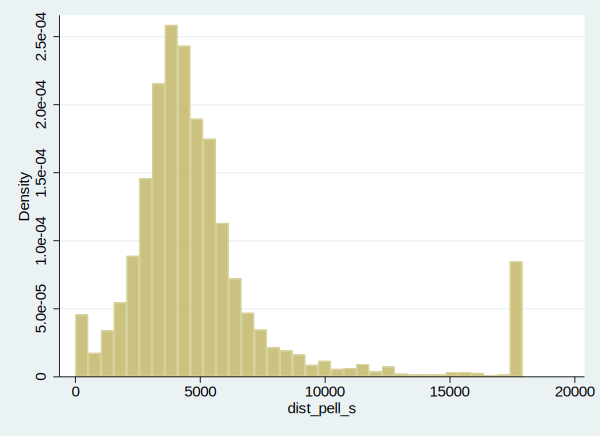

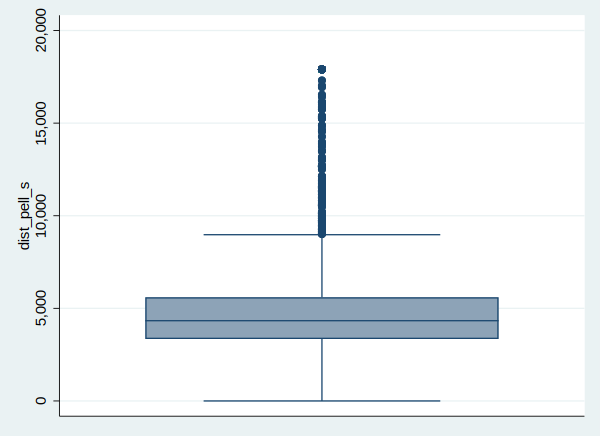

In [13]:
hist dist_pell_s
graph box dist_pell_s

## 6. Students at for-profit colleges have especially poor graduation rates at 4-year degree schools. In Eaton(2020) and Eaton, Howell, & Yannelis (2019), I've argued argued that for-profit colleges are more predatory under publicly traded and private equity ownership. Based on this theory, write a hypothesis about the relationship between whether a school offers 4-year or lower degrees and for-profit college ownership. Explain what is the independent variable and dependent variable and why? If you are working with your own data, do the same for a relationship between two **nominal** variables in your data. [4 pts]

1. [Hypothesis: Schools that offer 4-year or lower degress on average, are less likely to be predatory than for profit colleges //*due to the lack of financial pressures of creating profits for their public/private ownership//]

2. [Independent variable = degree of x years, dependent variable = predatory level (more/less). By changing the degree of x years, we can measure whether colleges are more or less predatory under publicly traded and private equity ownership. ]

## 7. Create a frequency table for colleges by their **level of degree offerings (iclevel)** and **ownership form (owner_pe)**. Make sure the dependent variable is listed first, making its values the row values. Stata doesn't like string variables, so use the commande **encode** with the **gen** specification to create encoded **iclevel2** and **owner_pe2** variables to use. If you are working with your own data, do the same for the two variables you hypothesized about. [3 pts]

In [25]:

encode iclevel, gen(iclevel2)
encode owner_pe, gen(owner_pe2)
des iclevel2 owner_pe2
tab iclevel2 owner_pe2




              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
iclevel2        long    %35.0g     iclevel2   
owner_pe2       long    %15.0g     owner_pe2
                                              


                      |            owner_pe2
             iclevel2 | Private e  Privately  Publicly  |     Total
----------------------+---------------------------------+----------
At least 2 but less t |       216        612        232 |     1,060 
   Four or more years |       104        191        495 |       790 
Less than 2 years (be |       232      1,364        195 |     1,791 
----------------------+---------------------------------+----------
                Total |       552      2,16

## 7. Create a horizontal bar graph using the **graph hbar** command with the **over** specification to plot the percentage of schools with degree levels within each ownership form. Use the **xi** command with the **noomit** option to create a dummy variable for iclevel. Do the same with your variables of interest if you are using your own data. [3 pts]

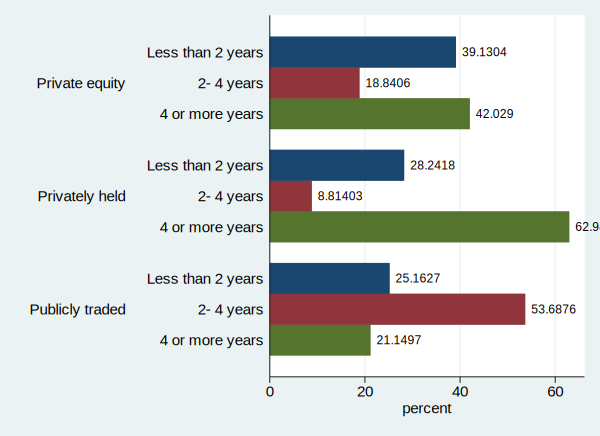

In [27]:
xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over(owner_pe2) label percentages legend(off) blabel(bar) showyvars yvaroptions(relabel (1 "Less than 2 years" 2 "2- 4 years" 3 "4 or more years"))

## 8. Provide your interpretation of the results from the bivariate frequency table and the bar graph. Is there a relationship between ownership form and offering higher degrees? Or in your own variables if using your own data? What is the relationship in your own words, and does it fit your hypothesis?
[Within private equity owned schools, 39.13% of degrees offered are less than 2 years. When comparing schools total offered degrees for less than two years, Publicly traded schools had the lowest with 25.16% of degrees offered of less than two years. Within private held schools, 8.81% of degrees offered are 2-4 year degrees. When comparing schools offered degrees of 2-4 years, Publicly traded schools had the highest with 53.69% of total degrees offered of 2-4 years. Within publicly traded schools, 21.15% of degrees offered are 4+ year degrees. When comparing schools offered degrees of 4+ years, Privately held schools had the highest with 62% of total degrees offered of 4+ years.]

## 9. Private equity and publicly traded ownership may lead to more predation. But privately held colleges can be predatory too. Within each ownership form, those colleges that are operated by chains may also be more likely to be predatory. Use the **chain** variable to generate another set of bivariate tables and bargraphs for **degree level (iclevel)** and **chain ownership** and for **chain ownership (chain)** and **ownership form (owner_pe)**. Do the same if you think there is another intervening variable in your own data. Then report your interpretation [5 pts]
[Interpretation below]

Less than 2 year degree and 2-4 year degree institutions are more likely to be chain owned. However, institutions that offer 4 or more year degress are more likely to not be chain owned. Institutions funded through private equity and public trade are hihly likely to be chain owned. Conversely, institutions that are privately held tend to not chain owned. 

In [31]:
tab chain, nol m
label define chain 0 "Not chain owned" 1 "Owned by chain"
label values chain chain

tab iclevel2 chain
tab chain owner_pe2

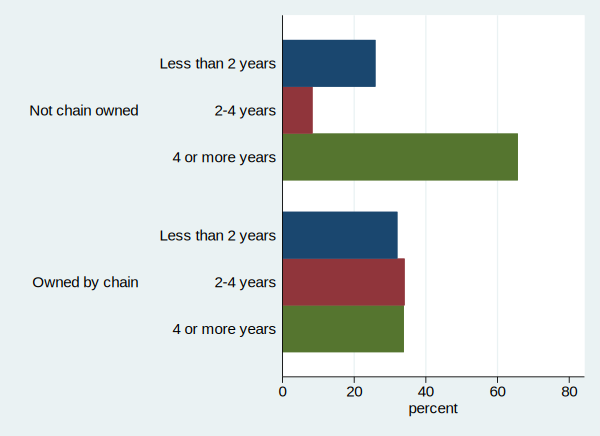

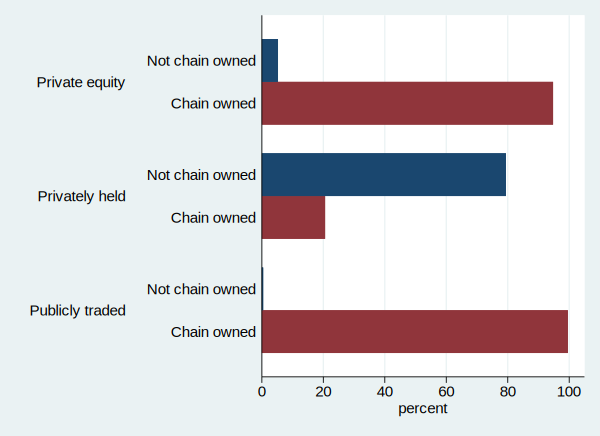

In [35]:

xi i.iclevel2, noomit
graph hbar _Iiclevel2_*, over(chain) label percentages legend(off) showyvars yvaroptions(relabel(1 "Less than 2 years" 2 "2-4 years" 3 "4 or more years"))

xi i.chain, noomit
graph hbar _Ichain_*, over(owner_pe2) label percentages legend(off) showyvars yvaroptions(relabel(1 "Not chain owned" 2 "Chain owned"))

## 10. Lastly, use **chain ownership** or the relevant variable for your own data as a control variable by 1) adding the specification "bysort iclevel:" before the "tab command" and 2) adding a "by(iclevel)" specification to the end of the graph command. Interpret the results [5 pts]
[No chain owned privately held schools hold the highest percentage of degress offered in all 3 categories. No chain owned publicly traded schools hold the lowest percentage of degress offered in all 3 ownership categories. 4 or more year degree institutions were more likely to be publicly traded and chain owned. 

 



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = At least 2 but less than 4 years

                |         chain
      owner_pe2 | Not chain  Owned by  |     Total
----------------+----------------------+----------
 Private equity |        11        205 |       216 
 Privately held |       444        168 |       612 
Publicly traded |         0        232 |       232 
----------------+----------------------+----------
          Total |       455        605 |     1,060 

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> iclevel = Four or more years

            

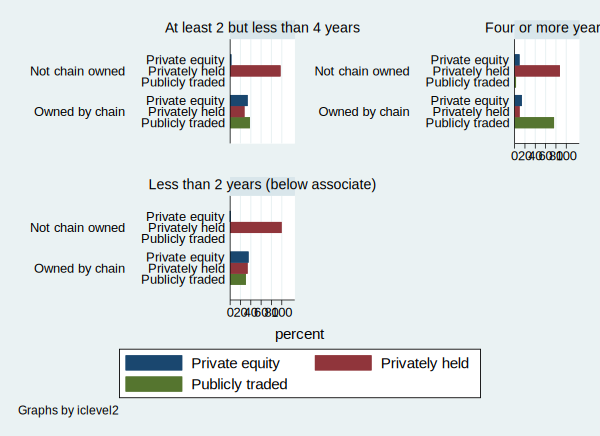

In [37]:
bysort iclevel: tab owner_pe2 chain

xi i.owner_pe2, noomit
graph hbar _Iowner_pe2_*, over(chain) label percentages showyvars yvaroptions(relabel(1 "Private equity" 2 "Privately held" 3 "Publicly traded")) by(iclevel2) legend(off)